In [86]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import constants, units
from astropy.coordinates import Angle
from scipy.optimize import curve_fit
import pandas as pd
import os
from scipy.signal import medfilt
import scipy.integrate as integrate

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/MUSE/'

Load in HST image

In [3]:
img = fits.open(rootdir+'f140w_comb.fits')

In [4]:
wcs = WCS(header=img[0].header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [5]:
# Pixel position in (y, x)
pixel = (1000, 1200)
 
# Convert
ra, dec = wcs.all_pix2world(pixel[0], pixel[1], 1, ra_dec_order=True)
y, x = wcs.all_world2pix(ra, dec, 1, adaptive=False, ra_dec_order=True)
 
# Print results
print('Pixel ({}, {}) converts to RA: {}, Dec:{}'.format(y, x, ra, dec))

Pixel (999.9999999995174, 1199.9999999997904) converts to RA: 231.07870783312183, Dec:9.99289145851804


In [6]:
img.info()

Filename: /Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/MUSE/f140w_comb.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     357   (1087, 965)   float32   


In [7]:
img[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1087 / Axis length                                    
NAXIS2  =                  965 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2022-10-12T21:09:26' / Date FITS file was generated                  
IRAF-TLM= '2022-10-18T13:24:12' / Time of last modification                     
NEXTEND =                    4 / Number of standard extensions                  
FILENAME= 'id7h37010_drz.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                            

In [8]:
img[0].header['PHOTFLAM']

1.4759001e-20

In [9]:
img[0].data

array([[-0.01319388, -0.01319388, -0.01319388, ..., -0.01319388,
        -0.01319388, -0.01319388],
       [-0.01319388, -0.01319388, -0.01319388, ..., -0.01319388,
        -0.01319388, -0.01319388],
       [-0.01319388, -0.01319388, -0.01319388, ..., -0.01319388,
        -0.01319388, -0.01319388],
       ...,
       [-0.02241725, -0.02241725, -0.02241725, ..., -0.01319388,
        -0.01319388, -0.01319388],
       [-0.02241725, -0.02241725, -0.02241725, ..., -0.01319388,
        -0.01319388, -0.01319388],
       [-0.02241725, -0.02241725, -0.02241725, ..., -0.01319388,
        -0.01319388, -0.01319388]], dtype=float32)

In [10]:
img[0].data*img[0].header['PHOTFLAM']

array([[-1.9472842e-22, -1.9472842e-22, -1.9472842e-22, ...,
        -1.9472842e-22, -1.9472842e-22, -1.9472842e-22],
       [-1.9472842e-22, -1.9472842e-22, -1.9472842e-22, ...,
        -1.9472842e-22, -1.9472842e-22, -1.9472842e-22],
       [-1.9472842e-22, -1.9472842e-22, -1.9472842e-22, ...,
        -1.9472842e-22, -1.9472842e-22, -1.9472842e-22],
       ...,
       [-3.3085616e-22, -3.3085616e-22, -3.3085616e-22, ...,
        -1.9472842e-22, -1.9472842e-22, -1.9472842e-22],
       [-3.3085616e-22, -3.3085616e-22, -3.3085616e-22, ...,
        -1.9472842e-22, -1.9472842e-22, -1.9472842e-22],
       [-3.3085616e-22, -3.3085616e-22, -3.3085616e-22, ...,
        -1.9472842e-22, -1.9472842e-22, -1.9472842e-22]], dtype=float32)

<ipython-input-11-214de29c55d0>:3: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(img[0].data*img[0].header['PHOTFLAM']))
<ipython-input-11-214de29c55d0>:3: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(img[0].data*img[0].header['PHOTFLAM']))


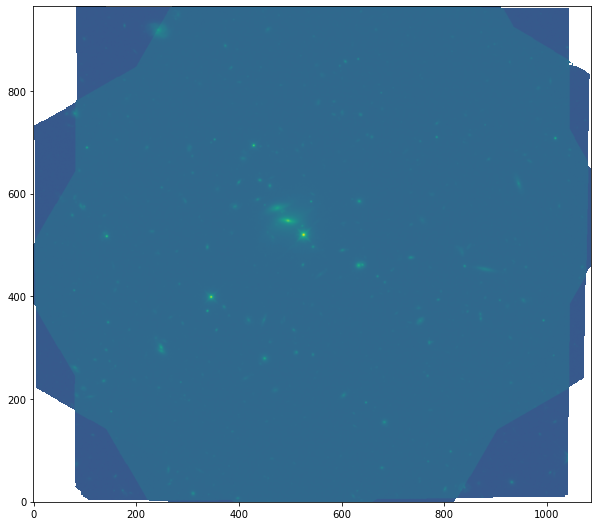

In [11]:
fig, ax = plt.subplots(1, figsize=(10,10))

ax.imshow(np.log10(img[0].data*img[0].header['PHOTFLAM']))
#plt.colorbar()
ax.invert_yaxis()

In [12]:
from astropy.wcs import WCS

In [13]:
wcs = WCS(img[0].header)

<ipython-input-14-1204ed68f5a7>:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img[0].data*img[0].header['PHOTFLAM']), origin='lower')
<ipython-input-14-1204ed68f5a7>:4: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img[0].data*img[0].header['PHOTFLAM']), origin='lower')


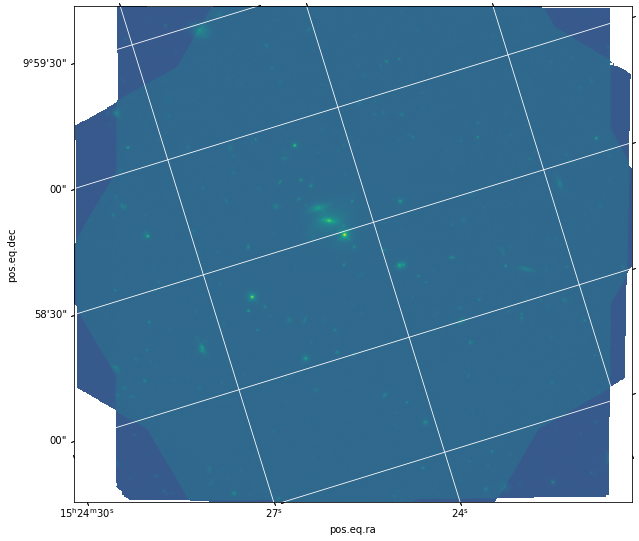

In [14]:
fig, ax = plt.subplots(1, figsize=(10,10))

plt.subplot(projection=wcs)
plt.imshow(np.log10(img[0].data*img[0].header['PHOTFLAM']), origin='lower')
plt.grid(color='white', ls='solid')
#plt.xlabel('Galactic Longitude')
#plt.ylabel('Galactic Latitude')

Load in the MUSE FITS file

In [15]:
muse_fits = fits.open(rootdir + 'COMBINED_CUBE_MED_FINAL_vac.fits')

In [16]:
muse_fits.info()

Filename: /Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/MUSE/COMBINED_CUBE_MED_FINAL_vac.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1211   ()      
  1  DATA          1 ImageHDU        42   (337, 319, 3682)   float32   
  2  STAT          1 ImageHDU        43   (337, 319, 3682)   float32   


In [17]:
data_hdu = muse_fits[1]
var_hdu = muse_fits[2]

In [18]:
data_hdu.header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  337 / Axis lenght                                    
NAXIS2  =                  319 / Axis lenght                                    
NAXIS3  =                 3682 / Axis lenght                                    
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
EXTNAME = 'DATA    '           / This extension contains data values            
HDUCLASS= 'ESO     '           / class name (ESO format)                        
HDUDOC  = 'DICD    '           / document with class description                
HDUVERS = 'DICD version 6'     / version number (according to spec v2.5.1)      
HDUCLAS1= 'IMAGE   '        

Extract the MUSE cube as a 3-D array

In [19]:
spec_cube = data_hdu.data.copy()

In [20]:
spec_cube.shape

(3682, 319, 337)

Extract the RA array

In [21]:
RA_ref_pix = data_hdu.header['CRPIX1']-1
RA_ref_val = data_hdu.header['CRVAL1']
del_RA = data_hdu.header['CD1_1']

In [22]:
RA_0_val = RA_ref_val - del_RA*RA_ref_pix

In [23]:
RA_arr = np.arange(RA_0_val, RA_0_val + spec_cube.shape[2]*del_RA, del_RA)

Extract Dec array

In [24]:
Dec_ref_pix = data_hdu.header['CRPIX2']-1
Dec_ref_val = data_hdu.header['CRVAL2']
del_Dec = data_hdu.header['CD2_2']

In [25]:
Dec_0_val = Dec_ref_val - del_Dec*Dec_ref_pix

In [26]:
Dec_arr = np.arange(Dec_0_val, Dec_0_val + spec_cube.shape[1]*del_Dec, del_Dec)

Load in the segmentation map

In [27]:
seg_fits = fits.open(rootdir+'test_seg.fits')

In [28]:
seg_fits.info()

Filename: /Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/MUSE/test_seg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU      42   (337, 319)   int32   


In [29]:
seg_fits[0].header

SIMPLE  =                    T                                                  
BITPIX  =                   32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                  337                                                  
NAXIS2  =                  319                                                  
                                                                                
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
EXTNAME = 'DATA    '           / This extension contains data values            
HDUCLASS= 'ESO     '           / class name (ESO format)                        
HDUDOC  = 'DICD    '           / document with class description                
HDUVERS = 'DICD version 6'     / version number (according to spec v2.5.1)      
HDUCLAS1= 'IMAGE   '        

Derive the segmentation map for the first galaxy

In [30]:
seg_map = seg_fits[0].data

Load in the segmentation map for galaxy IDs

In [31]:
cat_file = np.loadtxt(rootdir + 'test_new_updated.cat')

In [32]:
gal_ids_arr = np.int_(cat_file[:,0])

In [54]:
gal_ids_coords = {}

In [58]:
for i in range(len(gal_ids_arr)):
    
    gal_id = gal_ids_arr[i]
    
    seg_map_gal_y, seg_map_gal_x = np.where(seg_map==gal_id)
   
    gal_ids_coords[gal_id] = []
    
    for j in range(len(seg_map_gal_x)):
        
        ra = RA_arr[seg_map_gal_x[j]]
        dec = Dec_arr[seg_map_gal_y[j]]
        
        y, x = wcs.all_world2pix(ra, dec, 1, adaptive=False, ra_dec_order=True)
        
        gal_ids_coords[gal_id].append([int(np.round(y)), int(np.round(x))])
        
    gal_ids_coords[gal_id] = np.array(gal_ids_coords[gal_id])

<ipython-input-67-a77bd56e6816>:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img[0].data*img[0].header['PHOTFLAM']), origin='lower')
<ipython-input-67-a77bd56e6816>:4: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(img[0].data*img[0].header['PHOTFLAM']), origin='lower')


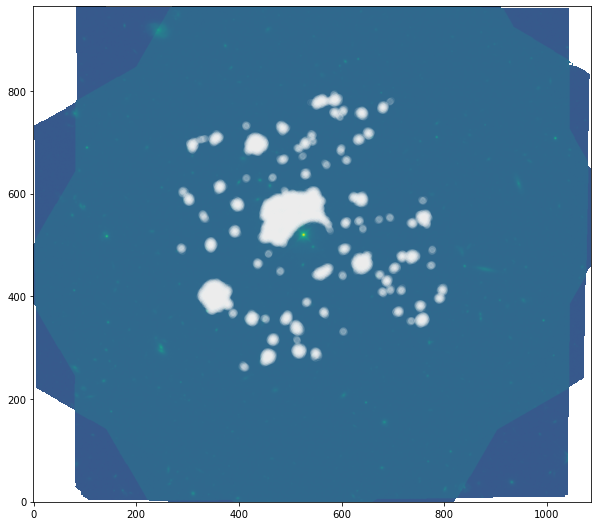

In [67]:
fig, ax = plt.subplots(1, figsize=(10,10))

#plt.subplot(projection=wcs)
plt.imshow(np.log10(img[0].data*img[0].header['PHOTFLAM']), origin='lower')
#plt.grid(color='white', ls='solid')

for i in range(len(gal_ids_arr)):
    ax.scatter(gal_ids_coords[gal_ids_arr[i]][:,0], gal_ids_coords[gal_ids_arr[i]][:,1], color='white', alpha=.05)
        
#plt.xlabel('Galactic Longitude')
#plt.ylabel('Galactic Latitude')

Add up fluxes for all galaxies and compute apparent magnitude

In [69]:
flux_map = img[0].data*img[0].header['PHOTFLAM']

In [74]:
gal_ids_flux = np.zeros(len(gal_ids_arr))

In [75]:
for i in range(len(gal_ids_arr)):
    
    gal_coords = gal_ids_coords[gal_ids_arr[i]]
    
    for j in range(gal_coords.shape[0]):
        
        coords = gal_coords[j]
        gal_ids_flux[i] += flux_map[coords[0], coords[1]]

In [78]:
gal_ids_mag = -2.5*np.log10(gal_ids_flux) + img[0].header['PHOTZPT']

Compute luminosity distance and compute absolute magnitudes

In [83]:
def lum_distance(z):
    
    omega_m = .315
    omega_lam = .685
    H_0 = 69.8/(3.09*10**19)
    c = 3*10**8
    D_H = c/H_0
    D_M = D_H*integrate.quad(lambda t: 1/np.sqrt(omega_m*(1+t)**3 + omega_lam), 0, z)[0]
    D_L = (1+z)*D_M
    
    return D_L*3.24078e-17

In [84]:
z_ids_arr = cat_
file[:,12]

In [89]:
gal_ids_dist = np.array([lum_distance(z) for z in z_ids_arr])

In [93]:
z_ids_arr

array([ 0.5356,  0.4581,  0.9576,  0.8217,  0.    ,  0.4784,  0.1393,
       -1.    ,  1.1935, -1.    ,  1.0959, -1.    , -1.    , -1.    ,
       -1.    , -1.    , -1.    , -1.    ,  0.6469,  1.3379, -1.    ,
       -1.    , -1.    , -1.    ,  0.701 , -1.    , -1.    ,  0.    ,
       -1.    ,  0.1204,  0.1203,  0.6531, -1.    ,  1.2256,  0.5723,
        0.7293,  1.3641,  0.3759, -1.    , -1.    , -1.    , -1.    ,
       -1.    ,  0.5191,  0.    ,  0.    , -1.    ,  1.3348, -1.    ,
       -1.    ,  0.3286,  0.3198,  0.2791,  0.5205, -1.    ,  1.3303,
       -1.    ,  1.2787, -1.    ,  0.6174,  1.3392,  1.339 , -1.    ,
        0.3752, -1.    ,  0.2915, -1.    ,  1.3379,  0.6178,  0.6183,
       -1.    ,  0.4395,  1.3393,  0.678 , -1.    , -1.    ,  0.    ,
       -1.    ,  0.0966, -1.    ])

In [92]:
gal_ids_dist

array([ 3.07561870e+09,  2.55180816e+09,  6.24076704e+09,  5.17170869e+09,
        0.00000000e+00,  2.68693203e+09,  6.60092314e+08, -0.00000000e+00,
        8.18423884e+09, -0.00000000e+00,  7.36790222e+09, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  3.86299825e+09,  9.42004922e+09,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        4.25924471e+09, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  5.63756660e+08,  5.63252339e+08,  3.90798168e+09,
       -0.00000000e+00,  8.45618384e+09,  3.33088919e+09,  4.46977875e+09,
        9.64757474e+09,  2.02081487e+09, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  2.96232488e+09,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  9.39319251e+09,
       -0.00000000e+00, -0.00000000e+00,  1.72779128e+09,  1.67434545e+09,
        1.43170945e+09,  

In [90]:
gal_ids_abs_mag = gal_ids_mag - 5*np.log10(gal_ids_dist/10)

<ipython-input-90-3b078b980d96>:1: RuntimeWarning: divide by zero encountered in log10
  gal_ids_abs_mag = gal_ids_mag - 5*np.log10(gal_ids_dist/10)


In [91]:
gal_ids_abs_mag

array([-19.19666222, -18.48205512, -20.42994265, -19.12572121,
                inf, -18.72289577, -15.32922245,          inf,
       -20.40428165,          inf, -18.9021067 ,          inf,
                inf,          inf,          inf,          inf,
                inf,          inf, -17.59679728, -20.54280435,
                inf,          inf,          inf,          inf,
       -19.31589942,          inf,          inf,          inf,
                inf, -17.64969128, -18.00098854, -18.57590533,
                inf, -19.80546011, -19.0005323 , -19.37594784,
       -20.22462875, -16.42304365,          inf,          inf,
                inf,          inf,          inf, -18.39470037,
                inf,          inf,          inf, -20.41900883,
                inf,          inf, -18.6811801 , -18.12829695,
       -16.29499173, -18.67240806,          inf, -19.43032187,
                inf, -19.29422709,          inf, -17.5247872 ,
       -21.5441539 , -19.442793  ,          inf, -17.55